In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import EA_funcs as eva
import matplotlib.pyplot as plt

In [2]:
data = eva.all_data

In [3]:
returns = data.pct_change().dropna()
cumulative = (1 + returns).cumprod() - 1

 There are a few (about 6) assets whose growth dominated over all others

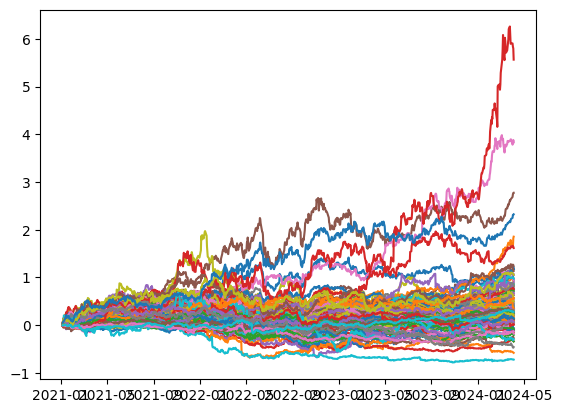

In [4]:
plt.plot(cumulative);

We will remove the ones that had a growth of 100% or higher to avoid our model to latch onto these ones and ignore the rest. This should force the algorithm to search for more complex, less obvious solutions.

In [5]:
final_returns = cumulative.iloc[-1]
top_performers = final_returns.sort_values(ascending=False)
top_performers = top_performers[top_performers>1]
print(top_performers)

NVDA    5.565955
LLY     3.831255
COP     2.774814
XOM     2.322984
GE      1.854134
SLB     1.617211
AIG     1.227504
CAT     1.174724
CVX     1.173002
GD      1.169623
SPG     1.137367
WFC     1.056153
ORCL    1.050906
Name: 2024-04-04 00:00:00, dtype: float64


In [6]:
data = data.drop(columns=top_performers.index)

It does look a bit more competitive now

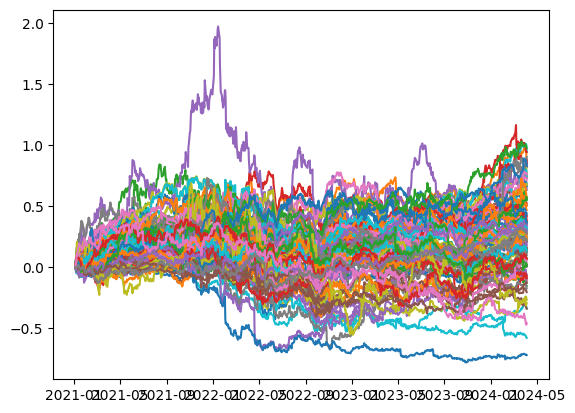

In [7]:
split = int(0.7 * len(data))
train_data = data[:split]
test_data = data[split:]

returns = data.pct_change().dropna()
cumulative = (1 + returns).cumprod() - 1

plt.plot(cumulative);

In [8]:
train_data.shape, test_data.shape

((572, 88), (246, 88))